In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import gc
import random

### Extract all image data 

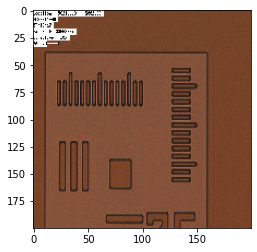

In [75]:
img = image.load_img(r"C:\Users\arjun\Desktop\miss_not_classif\base_data\test\good\1A1AY_R075_PH_INSPECT_VIS_{}_P001_DX-1DY-1SDX0SDY0_2020-11-08_05-19-11.JPG", target_size=(200,200) )
plt.imshow(img)

In [72]:
img.info

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}

In [14]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy') > .98) & (logs.get('val_accuracy') > .9):
            print("Reached 98% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [15]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'base_data/train/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        'base_data/validation/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 70 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'good': 0, 'misaligned': 1}

In [6]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  
      epochs=20,
      validation_data = validation_generator, callbacks=[callbacks])


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6981 - accuracy: 0.5143 - val_loss: 4.7585 - val_accuracy: 0.2727
Epoch 2/20
1/1 [==============================] - 1s 742ms/step - loss: 1.6628 - accuracy: 0.5143 - val_loss: 15.6487 - val_accuracy: 0.7273
Epoch 3/20
1/1 [==============================] - 1s 716ms/step - loss: 27.6630 - accuracy: 0.5143 - val_loss: 0.6678 - val_accuracy: 0.6591
Epoch 4/20
1/1 [==============================] - 1s 702ms/step - loss: 0.6604 - accuracy: 0.6143 - val_loss: 0.7094 - val_accuracy: 0.5909
Epoch 5/20
1/1 [==============================] - 1s 707ms/step - loss: 0.3443 - accuracy: 0.9286 - val_loss: 1.4642 - val_accuracy: 0.7273
Epoch 6/20
1/1 [==============================] - 1s 698ms/step - loss: 2.5660 - accuracy: 0.5143 - val_loss: 7.6775 - val_accuracy: 0.2727
Epoch 7/20
1/1 [==============================] - 1s 691ms/step - loss: 4.0732 - accuracy: 0.4857 - val_loss: 0.4298 - val_accuracy: 0.7727
Epoch 8/20
1/1 [=====

In [8]:
import pandas as pd

In [9]:
metrics = pd.DataFrame(model.history.history)

In [10]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.698110,0.514286,4.758468,0.272727
1,1.662767,0.514286,15.648651,0.727273
2,27.662956,0.514286,0.667773,0.659091
3,0.660387,0.614286,0.709409,0.590909
4,0.344293,0.928571,1.464178,0.727273
5,2.565958,0.514286,7.677492,0.272727
6,4.073168,0.485714,0.429843,0.772727
7,0.644568,0.600000,0.958727,0.340909
8,0.434570,0.900000,0.376663,0.863636
9,0.426309,0.742857,1.300308,0.318182


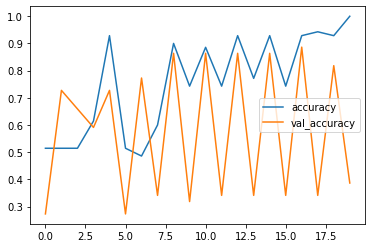

In [11]:
metrics[['accuracy', 'val_accuracy']].plot()

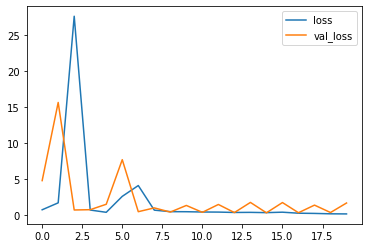

In [12]:
metrics[['loss','val_loss']].plot()

In [68]:
model.save('model.h5')

In [2]:
model = tf.keras.models.load_model('model.h5')

In [28]:
img = image.load_img(r'C:\Users\arjun\Desktop\miss_not_classif\base_data\validation\misaligned\3JOQ6_R077_PH_INSPECT_VIS_6_4_201018_021233.JPG', target_size=(200,200))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict_classes(images)
if classes[0]==0:
    print("Good")
else:
    print("Missaligned")

Missaligned


In [27]:
from PIL import Image
import os
import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import glob, os
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread

In [10]:
dir_path = "C:\\Users\\arjun\\Desktop\\miss_not_classif\\base_data"

In [11]:
os.listdir(dir_path)

['test', 'train', 'validation']

In [12]:
test_path = dir_path+'\\test\\'

In [13]:
os.listdir(test_path)

['good', 'misaligned']

In [15]:
os.listdir(test_path+'\\good')[0]

'1A1AY_R075_PH_INSPECT_VIS_{}_P001_DX-1DY-1SDX0SDY0_2020-11-08_05-19-11.JPG'

In [73]:
dd=(test_path+'\\misaligned')

In [74]:
dd

'C:\\Users\\arjun\\Desktop\\miss_not_classif\\base_data\\test\\\\misaligned'

In [80]:
os.chdir(dd)
for file in glob.glob("*.JPG"):
    img = image.load_img(file, target_size=(200,200))
    my_image = image.img_to_array(img)
    my_image = np.expand_dims(my_image, axis=0)
    classes=model.predict(my_image)
    if classes[0]==0:
        print(file,"good")
    else:
        print(file,"misaligned")

1P2ME_R072_PH_INSPECT_VIS_{}_P004_DX4DY12SDX8SDY1_2020-07-28_03-41-44.JPG misaligned
1P2ME_R072_PH_INSPECT_VIS_{}_P005_DX4DY9SDX8SDY1_2020-07-28_03-41-44.JPG misaligned
1P2ME_R072_PH_INSPECT_VIS_{}_P006_DX4DY5SDX8SDY1_2020-07-28_03-41-44.JPG misaligned
1P2ME_R072_PH_INSPECT_VIS_{}_P007_DX7DY3SDX8SDY1_2020-07-28_03-41-44.JPG misaligned
3JOQ6_R077_PH_INSPECT_VIS_6_10_201018_021250.JPG misaligned
3JOQ6_R077_PH_INSPECT_VIS_6_11_201018_021252.JPG misaligned
3JOQ6_R077_PH_INSPECT_VIS_6_12_201018_021254.JPG misaligned
